In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

OUTPUT_DIR = Path("../output").resolve()
FIGURES_DIR = OUTPUT_DIR / "figures"
CONSOMMATIONS_ENRICHIES_PARQUET_PATH = OUTPUT_DIR / "consommations_enrichies"
CONSOMMATIONS_ENRICHIES_CSV_PATH = OUTPUT_DIR / "consommations_enrichies.csv"

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [3]:
df = pd.read_parquet(CONSOMMATIONS_ENRICHIES_PARQUET_PATH.as_posix())
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['date'])
df['date_debut'] = pd.to_datetime(df['date'])
df['date_fin'] = pd.to_datetime(df['date'])
df['type_energie'] = df['type_energie'].astype("str")

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492584 entries, 0 to 7492583
Data columns (total 37 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   batiment_id                    object        
 1   timestamp                      datetime64[ns]
 2   consommation                   float64       
 3   unite                          object        
 4   hour                           int32         
 5   year                           int32         
 6   month                          int32         
 7   date                           datetime64[ns]
 8   nom                            object        
 9   type                           object        
 10  commune                        object        
 11  surface_m2                     int32         
 12  annee_construction             int32         
 13  classe_energetique             object        
 14  nb_occupants_moyen             int32         
 15  intensite_energ

,batiment_id,timestamp,consommation,unite,hour,year,month,date,nom,type,...,consommation_par_occupant,consommation_par_m2,consommation_journaliere,cout_journalier,cout_mensuel,cout_annuel,consommation_annuelle,IPE,consommation_moyenne_par_type,ecart_conso_moyenne_type
0,BAT0056,2024-01-13 08:00:00,5.23,m3,8,2024,1,2024-01-13,Ecole Nantes 56,ecole,...,0.038741,0.003350,2.573913,9.652174,27548.8875,315022.9875,84006.13,53.815586,7.617028,0.686620
1,BAT0001,2024-01-13 04:00:00,0.22,m3,4,2024,1,2024-01-13,Ecole Paris 1,ecole,...,0.000978,0.000114,1.989130,7.459239,21864.1500,252612.6000,67363.36,34.975784,7.617028,0.028883
2,BAT0056,2024-01-13 17:00:00,3.42,m3,17,2024,1,2024-01-13,Ecole Nantes 56,ecole,...,0.025333,0.002191,2.573913,9.652174,27548.8875,315022.9875,84006.13,53.815586,7.617028,0.448994
3,BAT0001,2024-01-13 09:00:00,2.30,m3,9,2024,1,2024-01-13,Ecole Paris 1,ecole,...,0.010222,0.001194,1.989130,7.459239,21864.1500,252612.6000,67363.36,34.975784,7.617028,0.301955
4,BAT0056,2024-01-13 19:00:00,3.68,m3,19,2024,1,2024-01-13,Ecole Nantes 56,ecole,...,0.027259,0.002357,2.573913,9.652174,27548.8875,315022.9875,84006.13,53.815586,7.617028,0.483128
5,BAT0001,2024-01-13 10:00:00,3.81,m3,10,2024,1,2024-01-13,Ecole Paris 1,ecole,...,0.016933,0.001978,1.989130,7.459239,21864.1500,252612.6000,67363.36,34.975784,7.617028,0.500195
6,BAT0057,2024-01-13 07:00:00,0.82,m3,7,2024,1,2024-01-13,Mairie Nantes 57,mairie,...,0.023429,0.000728,0.961304,3.604891,9985.0500,115972.2750,30925.94,27.465311,2.727374,0.300656
7,BAT0001,2024-01-13 13:00:00,2.68,m3,13,2024,1,2024-01-13,Ecole Paris 1,ecole,...,0.011911,0.001391,1.989130,7.459239,21864.1500,252612.6000,67363.36,34.975784,7.617028,0.351843
8,BAT0057,2024-01-13 11:00:00,1.36,m3,11,2024,1,2024-01-13,Mairie Nantes 57,mairie,...,0.038857,0.001208,0.961304,3.604891,9985.0500,115972.2750,30925.94,27.465311,2.727374,0.498648
9,BAT0002,2024-01-13 09:00:00,1.49,m3,9,2024,1,2024-01-13,Ecole Paris 2,ecole,...,0.003706,0.001289,0.859091,3.221591,9279.5625,104863.2375,27963.53,24.189905,7.617028,0.195614


#### Etape 4.2 : Visualisations Seaborn
Produire les visualisations suivantes avec Seaborn :

1. Pairplot des consommations (electricite, gaz, eau) par saison

In [10]:
# Pivoter pour avoir un type d'énergie par colonne
df_pivot = df.pivot_table(
    values="consommation",
    index=['timestamp', 'commune'],
    columns='type_energie',
    aggfunc='mean'
).reset_index()

# Ajouter la saison
df_pivot['month'] = df_pivot['timestamp'].dt.month
df_pivot['season'] = df_pivot['month'].map({
    12: 'Hiver', 1: 'Hiver', 2: 'Hiver',
    3: 'Printemps', 4: 'Printemps', 5: 'Printemps',
    6: 'Ete', 7: 'Ete', 8: 'Ete',
    9: 'Automne', 10: 'Automne', 11: 'Automne'
})

# Echantillonner pour performance
types_energie = ["eau", "gaz", "electricite"]
df_sample = df_pivot.dropna(subset=types_energie).sample(min(10_000, len(df_pivot)), random_state=42)

print(f"Echantillon pour pairplot: {len(df_sample)} lignes")

Echantillon pour pairplot: 10000 lignes


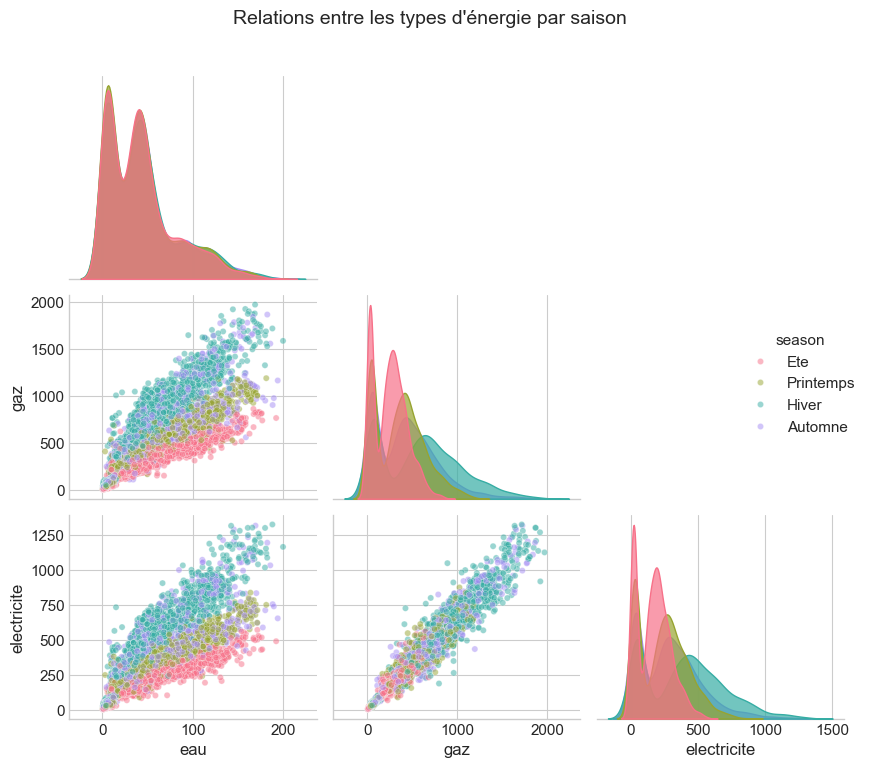

In [11]:
# Pairplot
g = sns.pairplot(
    df_sample[types_energie + ["season"]],
    hue="season",
    palette="husl",
    diag_kind="kde",
    plot_kws={"alpha": 0.5, "s": 20},
    diag_kws={"alpha": 0.7},
    corner=True
)

g.figure.suptitle("Relations entre les types d'énergie par saison", y=1.02, fontsize=14)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/06_pairplot_type_energie_saison.png", dpi=300, bbox_inches="tight")
plt.show()

2. Violin plot de la consommation electrique par type de batiment

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_23408\407113573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


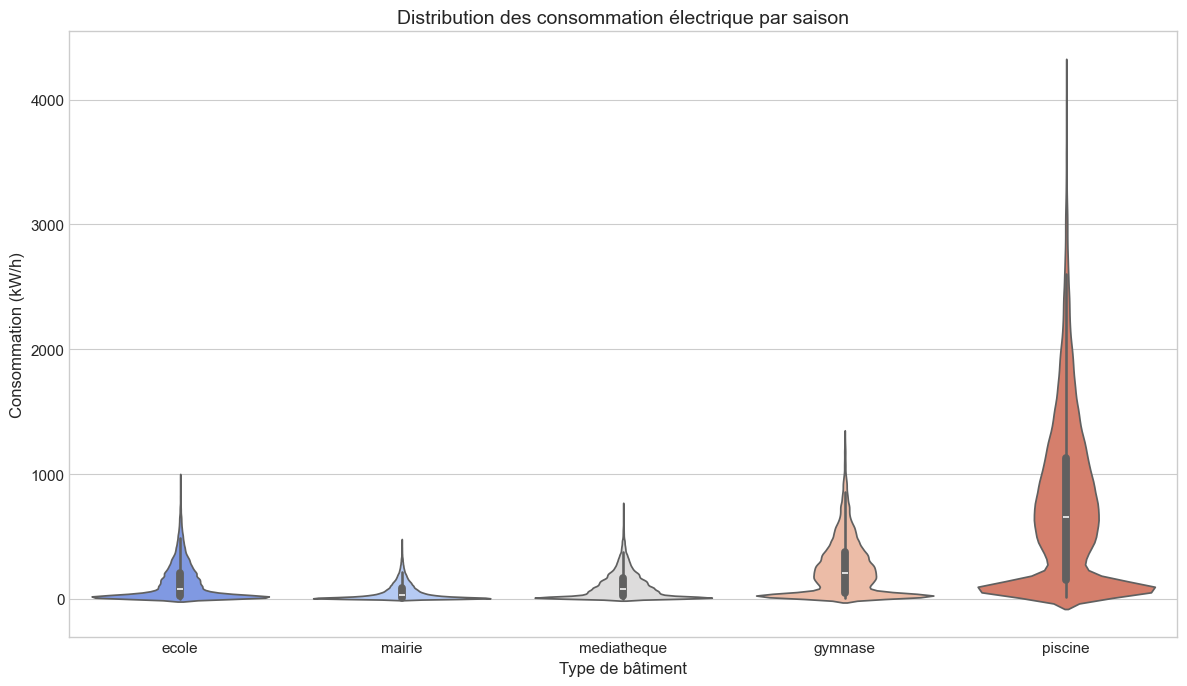

In [15]:
# Filtrer electricité
df_electricite = df[df["type_energie"] == "electricite"].copy()

# Ordre des type de bâtiment
type_order = ["ecole", "mairie", "mediatheque", "gymnase", "piscine"]

# Figure
fig, ax = plt.subplots(figsize=(12, 7))

# Violin plot
sns.violinplot(
    data=df_electricite,
    x="type",
    y="consommation",
    order=type_order,
    palette="coolwarm",
    inner="box",
    ax=ax
)

ax.set_xlabel("Type de bâtiment")
ax.set_ylabel("Consommation (kW/h)")
ax.set_title("Distribution des consommation électrique par saison")
ax.legend(loc="upper right")

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/07_violin_electricite_saison.png", dpi=300, bbox_inches="tight")
plt.show()

3. Heatmap annotee de la matrice de correlation complete

In [19]:
df_pivot = df.pivot_table(
    values="consommation",
    index=["timestamp", "commune"],
    columns="type_energie",
    aggfunc="mean"
).reset_index()

meteo_cols = ["temperature_c", "humidite_pct", "rayonnement_solaire_wm2", "vitesse_vent_kmh"]
df_meteo_unique = df[["timestamp", "commune"] + meteo_cols].drop_duplicates()

df_corr = df_pivot.merge(df_meteo_unique, on=['timestamp', 'commune'], how='left')

type_energie_cols = ["eau", "electricite", "gaz"]
available_type_energie = [m for m in type_energie_cols if m in df_corr.columns]
meteo_cols = ["temperature_c", "humidite_pct", "rayonnement_solaire_wm2", "vitesse_vent_kmh"]
available_meteo = [m for m in meteo_cols if m in df_corr.columns]

rename_map = {
    "temperature_c": "Temperature",
    "humidity_pct": "Humidite",
    "rayonnement_solaire_wm2": "Rayonnement",
    "vitesse_vent_kmh": "Vent"
}

corr_cols = available_type_energie + available_meteo

df_corr_renamed = df_corr[corr_cols].rename(columns=rename_map)

correlation_matrix = df_corr_renamed.corr()

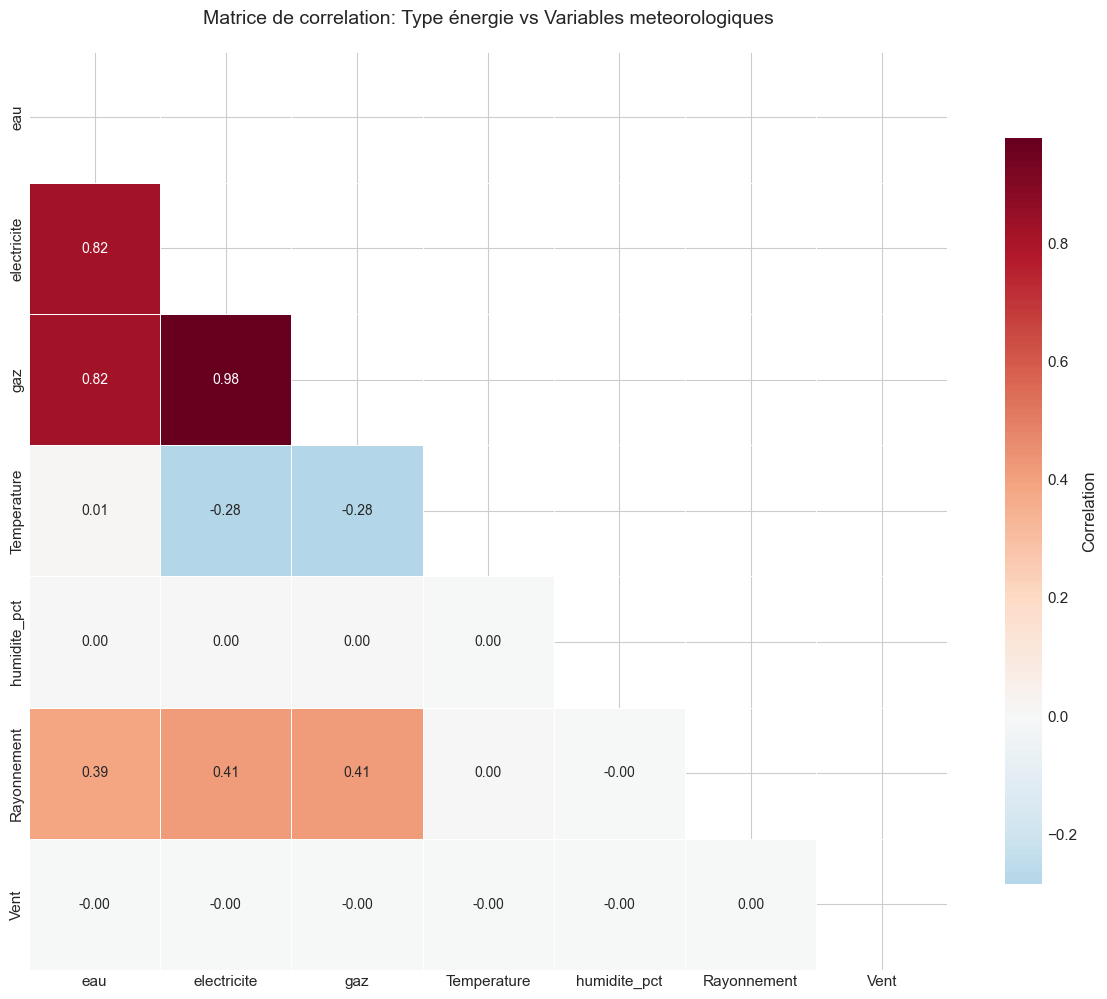

Figure sauvegardee: C:\Users\Administrateur\Documents\Damien_DESSAUX_ECF2\output\figures/08_heatmap_correlation.png


In [20]:
# Heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Masque pour triangle superieur
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
    ax=ax,
    annot_kws={'size': 10}
)

ax.set_title('Matrice de correlation: Type énergie vs Variables meteorologiques', fontsize=14, pad=20)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/08_heatmap_correlation.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure sauvegardee: {FIGURES_DIR}/08_heatmap_correlation.png")

4. FacetGrid : evolution mensuelle par commune (top 6 communes)

In [21]:
# Type énergie
type_energie = "electricite"

# Agreger par jour et commune pour PM2.5
df_electricite = df[df["type_energie"] == type_energie].copy()

daily_by_commune = df_electricite.groupby(["date", "commune"])["consommation"].mean().reset_index()

# Top 6 villes par pollution moyenne
top_commune = daily_by_commune.groupby("commune")["consommation"].mean().nlargest(6).index.tolist()
daily_top = daily_by_commune[daily_by_commune["commune"].isin(top_commune)]

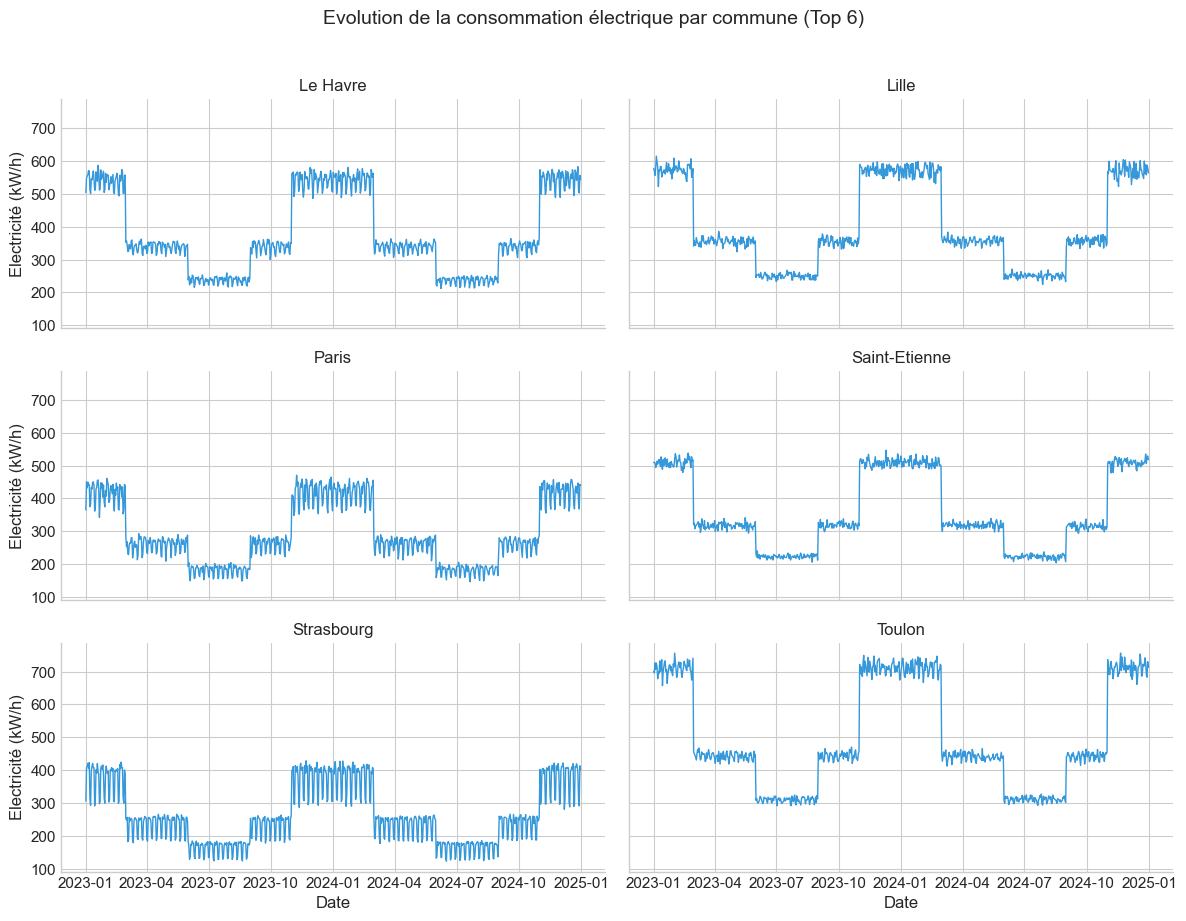

In [ ]:
# FacetGrid
g = sns.FacetGrid(
    daily_top,
    col="commune",
    col_wrap=2,
    height=3,
    aspect=2,
    sharey=True
)

g.map_dataframe(sns.lineplot, x="date", y="consommation", color="#3498DB", linewidth=1)

g.set_axis_labels("Date", "Electricité (kW/h)")
g.set_titles("{col_name}")
g.figure.suptitle("Evolution de la consommation électrique par commune (Top 6)", y=1.02, fontsize=14)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/09_facetgrid_communes.png", dpi=300, bbox_inches="tight")
plt.show()

5. Jointplot : relation surface vs consommation avec distributions marginales

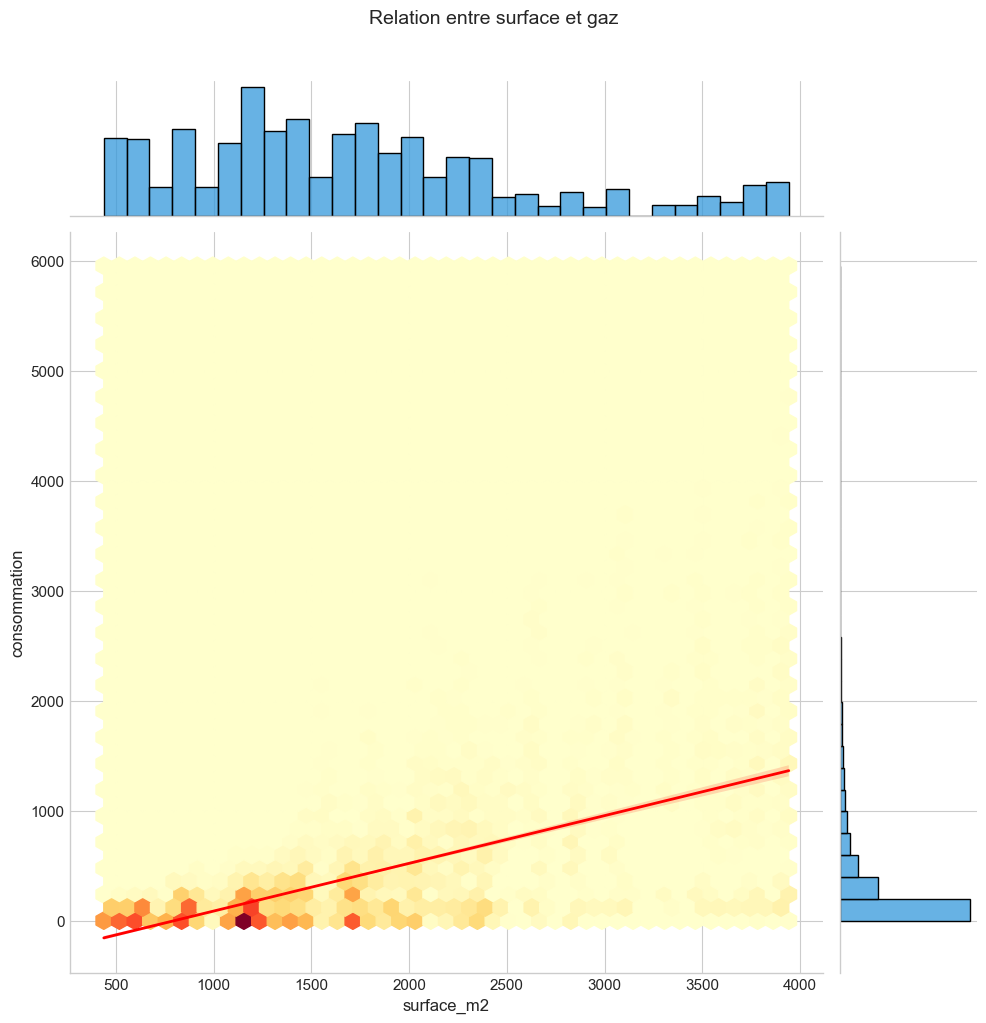

In [23]:
# type énergie
type_energie = "gaz"

# Donnees PM2.5 avec humidite
df_joint = df[(df["type_energie"] == type_energie) & (df["surface_m2"].notna())].copy()

# Echantillonner
if len(df_joint) > 10_000:
    df_joint_sample = df_joint.sample(10_000, random_state=42)
else:
    df_joint_sample = df_joint

# Jointplot
g = sns.jointplot(
    data=df_joint_sample,
    x="surface_m2",
    y="consommation",
    kind="hex",
    cmap="YlOrRd",
    marginal_kws={"color": "#3498DB", "bins": 30},
    height=10
)

g.ax_joint.set_xlabel("Surface (m2)")
g.ax_joint.set_ylabel("Consommation gaz (kW/h)")
g.figure.suptitle("Relation entre surface et gaz", y=1.02, fontsize=14)

# Ajouter regression
sns.regplot(
    data=df_joint_sample,
    x="surface_m2",
    y="consommation",
    scatter=False,
    ax=g.ax_joint,
    color="red",
    line_kws={"linewidth": 2}
)

plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/10_jointplot_surface_gaz.png", dpi=300, bbox_inches="tight")
plt.show()

6. Catplot : consommation par classe energetique et type de batiment

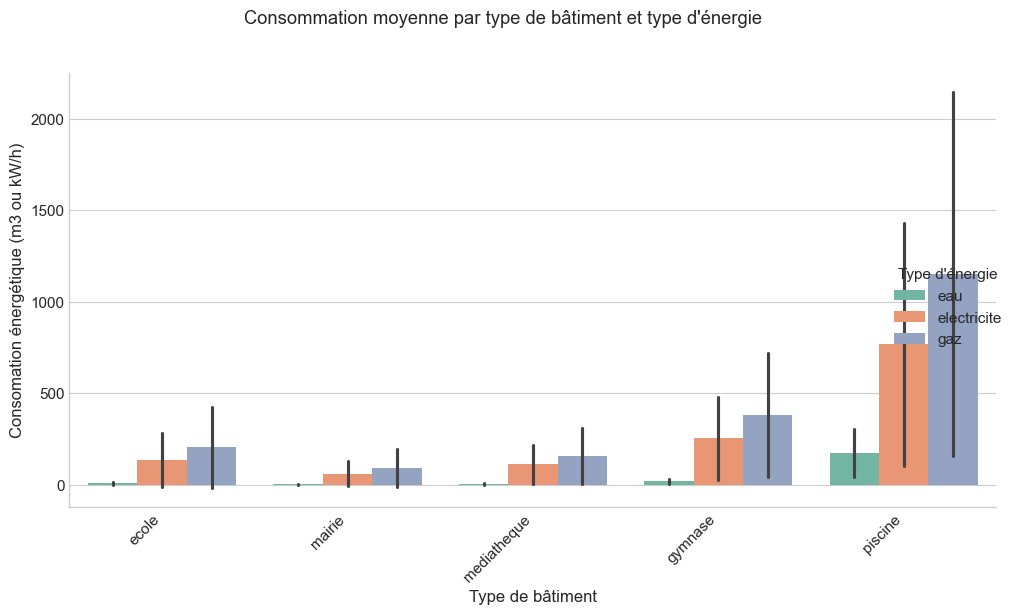

In [26]:
# Catplot
g = sns.catplot(
    data=df,
    x="type",
    y="consommation",
    hue="type_energie",
    kind="bar",
    height=6,
    aspect=1.5,
    palette="Set2",
    errorbar="sd"
)

g.set_axis_labels("Type de bâtiment", "Consomation énergétique (m3 ou kW/h)")
g.legend.set_title("Type d'énergie")
g.figure.suptitle("Consommation moyenne par type de bâtiment et type d'énergie", y=1.02)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{FIGURES_DIR}/11_catplot_batiment_type_energie.png", dpi=300, bbox_inches="tight")
plt.show()

**Livrables** :
- Notebook `10_visualisations_seaborn.ipynb`
- 6 figures PNG (300 dpi) dans `output/figures/`